In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
zoo = pd.read_csv("./zoo/zoo.data", header=None)
zoo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
#Adding Column Names to the Dataset
zoo.columns = [
    "animal name",
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "legs",
    "tail",
    "domestic",
    "catsize",
    "type",
]

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
zoo.drop("animal name", axis = 1, inplace=True)

In [7]:
#Checking whether the dataset contains any null values
print(zoo.isna().values.any())
print(zoo.isnull().values.any())

False
False


In [8]:
data_split = np.random.rand(len(zoo))<0.7
train = zoo[data_split]
test = zoo[~data_split]
train.shape, test.shape


((68, 17), (33, 17))

In [9]:
#Separating the Independent and the Dependent Variables
X_train = train.drop("type", axis=1)
X_train = X_train.values
y_train = train["type"]
y_train = y_train.values

X_test = test.drop("type", axis=1)
X_test = X_test.values
y_test = test["type"]
y_test = y_test.values

X_train.shape
y_train.shape

(68,)

In [10]:
class KNN:
    def __init__(self, k): #Constructor Method to initialise the KNN object with k
        self.k = k
    def fit(self, X, y): #Method to fit the Model to the training data
        self.X_train = X
        self.y_train = y
    def distance(self, X1, X2): #Method to calculate the euclidean distance
        dist = np.sqrt(np.sum(np.square(X1 - X2)))
        return dist
    def predict(self, X_test): #Method to make predictions for X_test using the already given data stored in self
        final_output = []
        for i in range(len(X_test)): #Loop to iterate throught each data point of X_test
            d = []
            votes = []
            for j in range(len(self.X_train)): #Loop to iterate through the training dataset
                dist = self.distance(self.X_train[j], X_test[i])
                d.append([dist, j]) #d list stores the distances and their corresponding training data points
            d.sort() #Sorting the list in ascending order
            d = d[:self.k] #Only the top k neighbors are retained
            for d, j in d: #Looping through the distance and indices of the selected k neighbors
                votes.append(y_train[j]) #Appending the class label of the training data point with index 'j'
            ans = Counter(votes).most_common(1)[0][0] #Counting the number of votes for each class. Class with the most votes in determined as the prediction
            final_output.append(ans) #Result is stored in the final output list
        return final_output
    def score(self, X_test, y_test): #Method to predict the accuracy of the KNN class
        predictions = self.predict(X_test)
        corrected_pred = 0
        for i in range(len(predictions)):
            if(predictions[i]==y_test[i]):
                corrected_pred +=1
        return corrected_pred / len(predictions)

In [11]:
#Prediction

KNN_Classi = KNN(3)
KNN_Classi.fit(X_train, y_train)
predictions = KNN_Classi.predict(X_test)
accuracy_KNN = KNN_Classi.score(X_test, y_test)

print("Accuracy : ", accuracy_KNN)

print("Predicted\tTrue Values\tComparison")
for pred, true_value in zip(predictions, y_test):
    comparison = pred == true_value
    print(f'{pred}  \t\t {true_value}  \t\t {comparison} \n')

Accuracy :  0.9696969696969697
Predicted	True Values	Comparison
1  		 1  		 True 

4  		 4  		 True 

4  		 4  		 True 

1  		 1  		 True 

7  		 7  		 True 

2  		 2  		 True 

1  		 1  		 True 

4  		 4  		 True 

2  		 2  		 True 

1  		 1  		 True 

1  		 1  		 True 

6  		 6  		 True 

1  		 1  		 True 

2  		 2  		 True 

2  		 2  		 True 

6  		 6  		 True 

2  		 2  		 True 

1  		 1  		 True 

1  		 1  		 True 

5  		 5  		 True 

2  		 2  		 True 

2  		 2  		 True 

3  		 3  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

2  		 2  		 True 

7  		 7  		 True 

2  		 2  		 True 

1  		 3  		 False 

1  		 1  		 True 

7  		 7  		 True 



In [12]:
#Random Prediction
KNN_Classi = KNN(3)
KNN_Classi.fit(X_train, y_train)
random_test = np.array([1,0,1,0,1,1,1,0,1,1,0,1,0,1,1,1]).reshape(1, -1)

predictions = KNN_Classi.predict(random_test)

print("Predicted Class: ", predictions[0])


Predicted Class:  4


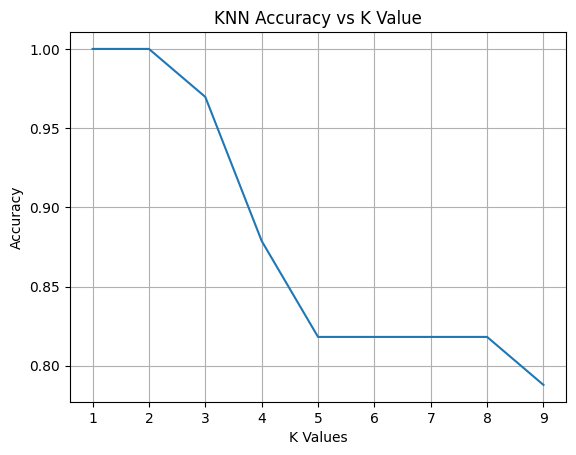

In [13]:
from sklearn.metrics import accuracy_score

accuracies = []
k_values = range(1,10)

for k in k_values:
    knn = KNN(k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K Value')
plt.grid()
plt.show()

Weighted KNN

In [20]:
class WEIGHTED_KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        dist = np.sqrt(np.sum(np.square(X1 - X2)))
        return dist

    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []  # Stores distances
            votes = Counter()
            for j in range(len(self.X_train)):
                dist = self.distance(self.X_train[j], X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[:self.k]
            weights = [1/weight for weight, _ in d]
            total_weights = sum(weights)
            weight = [w / total_weights for w in weights]
            for (di, j), weig in zip(d, weight):
                votes[self.y_train[j]] += weig
            ans = votes.most_common(1)[0][0]
            final_output.append(ans)
        return final_output


    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        corrected_pred = 0
        for i in range(len(predictions)):
            if predictions[i] == y_test[i]:
                corrected_pred += 1
        return corrected_pred / len(predictions)


In [21]:
#Prediction

KNN_Classi = WEIGHTED_KNN(3)
KNN_Classi.fit(X_train, y_train)
predictions = KNN_Classi.predict(X_test)
accuracy_WKNN = KNN_Classi.score(X_test, y_test)

print("Accuracy : ", accuracy_WKNN)

print("Predicted\tTrue Values\tComparison")
for pred, true_value in zip(predictions, y_test):
    comparison = pred == true_value
    print(f'{pred}  \t\t {true_value}  \t\t {comparison} \n')

Accuracy :  0.9696969696969697
Predicted	True Values	Comparison
1  		 1  		 True 

4  		 4  		 True 

4  		 4  		 True 

1  		 1  		 True 

7  		 7  		 True 

2  		 2  		 True 

1  		 1  		 True 

4  		 4  		 True 

2  		 2  		 True 

1  		 1  		 True 

1  		 1  		 True 

6  		 6  		 True 

1  		 1  		 True 

2  		 2  		 True 

2  		 2  		 True 

6  		 6  		 True 

2  		 2  		 True 

1  		 1  		 True 

1  		 1  		 True 

5  		 5  		 True 

2  		 2  		 True 

2  		 2  		 True 

3  		 3  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

2  		 2  		 True 

7  		 7  		 True 

2  		 2  		 True 

1  		 3  		 False 

1  		 1  		 True 

7  		 7  		 True 



In [22]:
#Random Prediction
KNN_Classi = WEIGHTED_KNN(3)
KNN_Classi.fit(X_train, y_train)
random_test = np.array([1,0,1,0,1,1,1,0,1,1,0,1,0,1,1,1]).reshape(1, -1)

predictions = KNN_Classi.predict(random_test)

print("Predicted Class: ", predictions[0])

Predicted Class:  4


Nearest Centroid Classifier

In [23]:
class NEAREST_CENTROID:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        dist = np.sqrt(np.sum(np.square(X1 - X2)))
        return dist

    def predict(self, X_test):
        unique_classes = np.unique(self.y_train)
        centroids = {}

        for class_label in unique_classes:
            class_indices = np.where(self.y_train == class_label)
            class_data = self.X_train[class_indices]
            class_centroid = np.mean(class_data, axis=0)
            centroids[class_label] = class_centroid

        final_output = []
        for i in range(len(X_test)):
            d = []  # Stores distances
            for class_label, centroid in centroids.items():
                dist = self.distance(centroid, X_test[i])
                d.append((dist, class_label))
            d.sort()  # Sort by distance
            d = d[:self.k]  # Keep the top k nearest centroids
            nearest_classes = [class_label for _, class_label in d]
            ans = Counter(nearest_classes).most_common(1)[0][0]
            final_output.append(ans)
        return final_output

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        corrected_pred = 0
        for i in range(len(predictions)):
            if predictions[i] == y_test[i]:
                corrected_pred += 1
        return corrected_pred / len(predictions)


In [24]:
#Prediction

KNN_Classi = NEAREST_CENTROID(3)
KNN_Classi.fit(X_train, y_train)
predictions = KNN_Classi.predict(X_test)
accuracy_NCC = KNN_Classi.score(X_test, y_test)

print("Accuracy : ", accuracy_NCC)

print("Predicted\tTrue Values\tComparison")
for pred, true_value in zip(predictions, y_test):
    comparison = pred == true_value
    print(f'{pred}  \t\t {true_value}  \t\t {comparison} \n')

Accuracy :  0.8484848484848485
Predicted	True Values	Comparison
1  		 1  		 True 

4  		 4  		 True 

4  		 4  		 True 

1  		 1  		 True 

4  		 7  		 False 

2  		 2  		 True 

1  		 1  		 True 

4  		 4  		 True 

2  		 2  		 True 

1  		 1  		 True 

1  		 1  		 True 

6  		 6  		 True 

1  		 1  		 True 

2  		 2  		 True 

2  		 2  		 True 

6  		 6  		 True 

2  		 2  		 True 

1  		 1  		 True 

1  		 1  		 True 

5  		 5  		 True 

2  		 2  		 True 

2  		 2  		 True 

3  		 3  		 True 

1  		 1  		 True 

1  		 1  		 True 

4  		 1  		 False 

1  		 1  		 True 

2  		 2  		 True 

3  		 7  		 False 

2  		 2  		 True 

1  		 3  		 False 

1  		 1  		 True 

3  		 7  		 False 



In [25]:
#Random Prediction
KNN_Classi = NEAREST_CENTROID(3)
KNN_Classi.fit(X_train, y_train)
random_test = np.array([1,0,1,0,1,1,1,0,1,1,0,1,0,1,1,1]).reshape(1, -1)

predictions = KNN_Classi.predict(random_test)

print("Predicted Class: ", predictions[0])

Predicted Class:  4


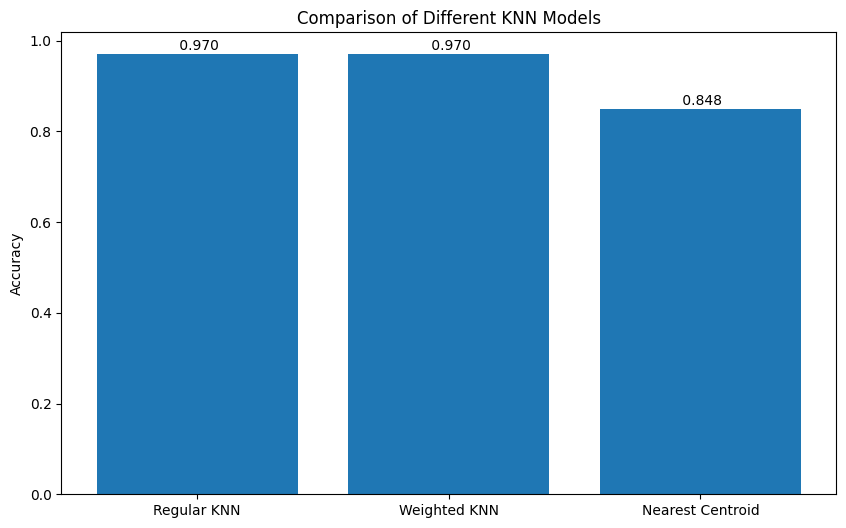

In [26]:
#Comparison chart between the Accuracies of all variants of KNN

model_names = ['Regular KNN', 'Weighted KNN', 'Nearest Centroid']
accuracy_scores = [accuracy_KNN, accuracy_WKNN, accuracy_NCC]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores)
plt.title("Comparison of Different KNN Models")
plt.ylabel('Accuracy')
#plt.ylim(0,1) #Setting the y-axos limit to ensure the same scale
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01, f'{accuracy: .3f}', ha='center')
plt.show()